<a href="https://colab.research.google.com/github/sahil301290/Deep-Learning/blob/master/Shakespeare_BiLSTM_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()
print(data)

--2020-10-06 08:34:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-10-06 08:34:33 (108 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

FROM fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou, contracted to thine own bright eyes,
Feed'st thy light'st flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world's fresh ornament
And only herald to the gaud

In [3]:
corpus = data.lower().split("\n")
print(corpus)

['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou, contracted to thine own bright eyes,', "feed'st thy light'st flame with self-substantial fuel,", 'making a famine where abundance lies,', 'thyself thy foe, to thy sweet self too cruel.', "thou that art now the world's fresh ornament", 'and only herald to the gaudy spring,', 'within thine own bud buriest thy content', 'and, tender churl, makest waste in niggarding.', 'pity the world, or else this glutton be,', "to eat the world's due, by the grave and thee.", 'when forty winters shall beseige thy brow,', "and dig deep trenches in thy beauty's field,", "thy youth's proud livery, so gazed on now,", "will be a tatter'd weed, of small worth held:", "then being ask'd where all thy beauty lies,", 'where all the treasure of thy lusty days,', 'to say, within thine own deep-sunken eyes,', 'were an all-eating

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

3211


In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
	print(token_list)

[34, 417, 877, 166, 213, 517]
[8, 878, 134, 351, 102, 156, 199]
[16, 22, 2, 879, 61, 30, 48, 634]
[25, 311, 635, 102, 200, 25, 278]
[16, 10, 880, 3, 62, 85, 214, 53]
[1372, 9, 1373, 636, 11, 122, 1374, 1375]
[201, 17, 1376, 64, 518, 202]
[118, 9, 1377, 3, 9, 47, 122, 135, 279]
[10, 8, 54, 63, 2, 418, 312, 419]
[1, 352, 1378, 3, 2, 1379, 420]
[215, 62, 85, 881, 1380, 9, 882]
[1, 311, 883, 884, 313, 7, 1381]
[257, 2, 94, 36, 353, 29, 1382, 21]
[3, 637, 2, 418, 354, 30, 2, 638, 1, 19]
[27, 1383, 885, 46, 1384, 9, 280]
[1, 1385, 281, 1386, 7, 9, 134, 1387]
[9, 1388, 179, 1389, 20, 1390, 35, 63]
[49, 21, 17, 886, 639, 4, 887, 126, 888]
[38, 81, 1391, 64, 23, 9, 51, 202]
[64, 23, 2, 258, 4, 9, 889, 145]
[3, 95, 215, 62, 85, 281, 1392, 53]
[86, 146, 23, 1393, 236, 1, 1394, 96]
[71, 136, 43, 96, 1395, 9, 134, 186]
[42, 10, 1396, 640, 890, 69, 282, 4, 44]
[46, 519, 5, 520, 1, 65, 5, 112, 314, 147]
[1397, 25, 51, 30, 1398, 62]
[29, 86, 3, 21, 98, 127, 27, 10, 54, 112]
[1, 76, 9, 283, 1399, 27, 1

In [6]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)
print(max_sequence_len)

[[   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 [   0    0    0 ...  417  877  166]
 ...
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]
 [   0    0    0 ... 3210   15   14]]
11


In [7]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)
print(label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 256)           234496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              207045    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,116,627
Trainable params: 6,116,627
Non-trainable params: 0
____________________________________________

In [11]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 11ms/step - loss: 6.9241 - accuracy: 0.0235
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5003 - accuracy: 0.0250
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3853 - accuracy: 0.0257
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2619 - accuracy: 0.0289
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1746 - accuracy: 0.0368
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0987 - accuracy: 0.0388
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0206 - accuracy: 0.0398
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9382 - accuracy: 0.0451
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8339 - accuracy: 0.0499
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.723

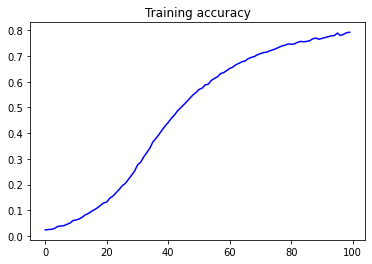

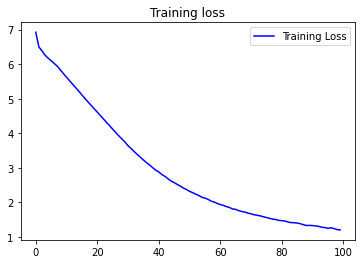

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Et tu Brute, then die Caeser"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Et tu Brute, then die Caeser for goodness say what eyes live in love one light still alone lies by too one twain near thee twain rare twain gems dwells heart may come hour she did grew grew hast dead both night and die torn dwells bow show stay thee hast thee how you have pace defence first torn rotten smoke greater crime heart away any impute dwells dwells car dwells flatter tongue men unseen to stain will keep sinful night quite cold light hour there luck weak by shown subjects quite present greater faces thee new fired dun warm'd gems car gems gems unbred bevel
